<a href="https://colab.research.google.com/github/guptamanishacs/manisha80/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [4]:
import pandas as pd
import numpy as np

# Load the uploaded dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Remove rows where target (stroke) is missing, if any
df = df.dropna()

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False
5,56669,81.0,0,0,186.21,29.0,1,True,False,True,False,True,False,False,True,True,False,False


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Simple Regression (age → stroke)
X = df_encoded[['age']]
y = df_encoded['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Predictions
y_pred = simple_model.predict(X_test)

print("Intercept:", simple_model.intercept_)
print("Coefficient:", simple_model.coef_[0])
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Intercept: -0.04353908679912705
Coefficient: 0.0019472614769321052
R² Score: 0.06036111977025416
MSE: 0.04797661319833581


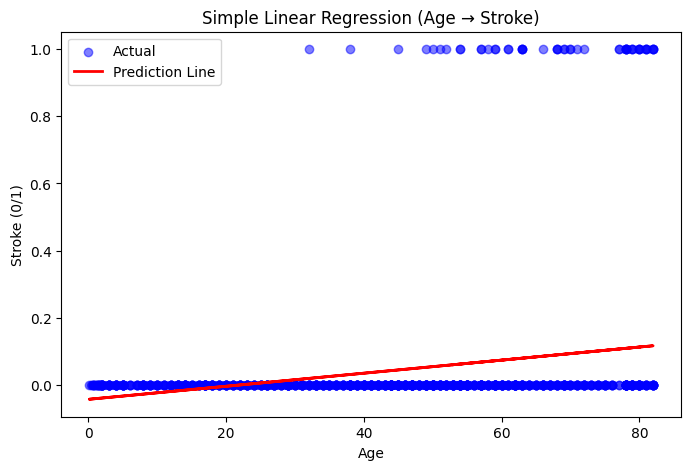

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Line')

plt.xlabel("Age")
plt.ylabel("Stroke (0/1)")
plt.title("Simple Linear Regression (Age → Stroke)")
plt.legend()
plt.show()


In [8]:
# Features (all except stroke)
X_multi = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y, test_size=0.2, random_state=42)

# Model
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

# Predictions
y_pred_m = multi_model.predict(X_test_m)

# Coefficients Table
coef_df = pd.DataFrame({
    "Feature": X_multi.columns,
    "Coefficient": multi_model.coef_
})
print(coef_df)

print("\nR² Score (Multiple Regression):", r2_score(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))


                           Feature   Coefficient
0                               id  9.878546e-08
1                              age  2.457836e-03
2                     hypertension  3.928688e-02
3                    heart_disease  4.639597e-02
4                avg_glucose_level  3.637064e-04
5                              bmi -5.946248e-04
6                      gender_Male  1.737817e-03
7                     gender_Other -2.861400e-02
8                 ever_married_Yes -2.453570e-02
9           work_type_Never_worked  2.861618e-02
10               work_type_Private  9.937172e-03
11         work_type_Self-employed -1.394929e-02
12              work_type_children  5.284311e-02
13            Residence_type_Urban  3.461776e-03
14  smoking_status_formerly smoked  7.072036e-03
15     smoking_status_never smoked  1.794295e-03
16           smoking_status_smokes  9.726012e-03

R² Score (Multiple Regression): 0.08887354999537522
MSE: 0.04652080941558822


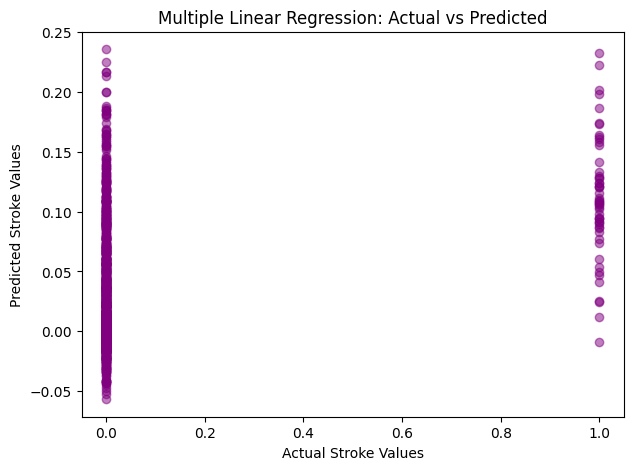

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(y_test_m, y_pred_m, alpha=0.5, color='purple')

plt.xlabel("Actual Stroke Values")
plt.ylabel("Predicted Stroke Values")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [11]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
df.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [14]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df = df.dropna()


In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


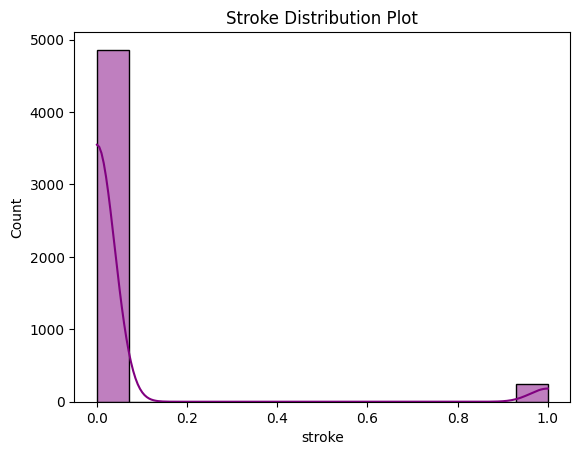

In [16]:
plt.title('Stroke Distribution Plot')
sns.histplot(df['stroke'], kde=True, color='purple')
plt.show()


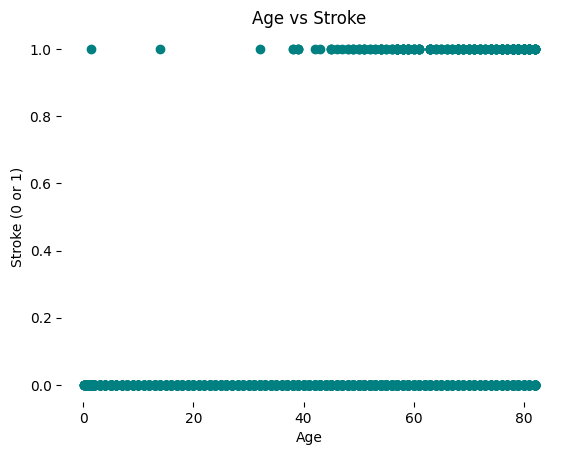

In [17]:
plt.scatter(df['age'], df['stroke'], color='teal')
plt.title("Age vs Stroke")
plt.xlabel("Age")
plt.ylabel("Stroke (0 or 1)")
plt.box(False)
plt.show()


In [18]:
X = df_encoded[['age']]     # Independent variable
y = df_encoded[['stroke']]  # Dependent variable


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [21]:
y_pred_train = regressor.predict(X_train)
y_pred_test  = regressor.predict(X_test)


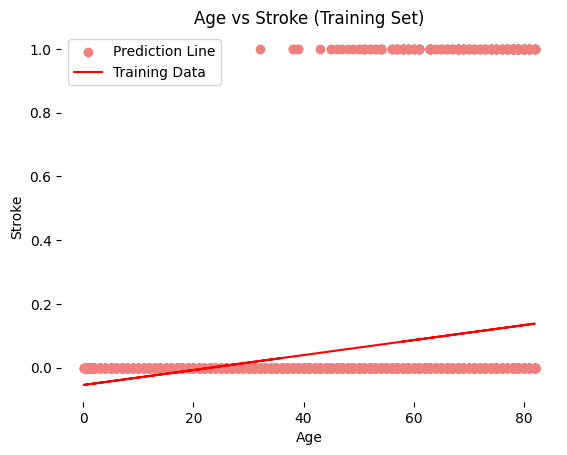

In [22]:
plt.scatter(X_train, y_train, color='lightcoral')
plt.plot(X_train, y_pred_train, color='red')

plt.title('Age vs Stroke (Training Set)')
plt.xlabel('Age')
plt.ylabel('Stroke')
plt.legend(['Prediction Line', 'Training Data'], loc='best')
plt.box(False)
plt.show()


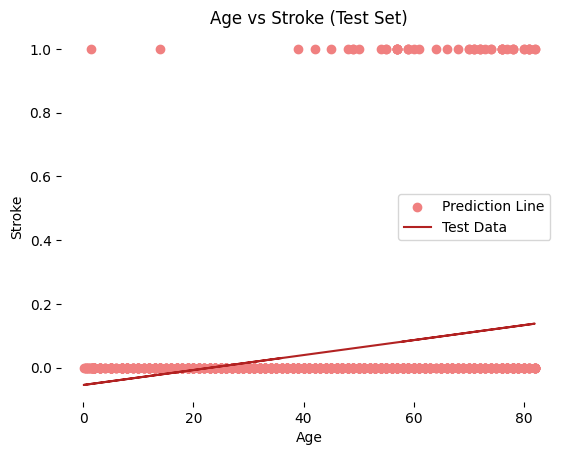

In [23]:
# Prediction on test set (Corrected for Stroke Dataset)
plt.scatter(X_test, y_test, color='lightcoral')
plt.plot(X_train, y_pred_train, color='firebrick')

plt.title('Age vs Stroke (Test Set)')
plt.xlabel('Age')
plt.ylabel('Stroke')
plt.legend(['Prediction Line', 'Test Data'], loc='best', facecolor='white')

plt.box(False)
plt.show()
